/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


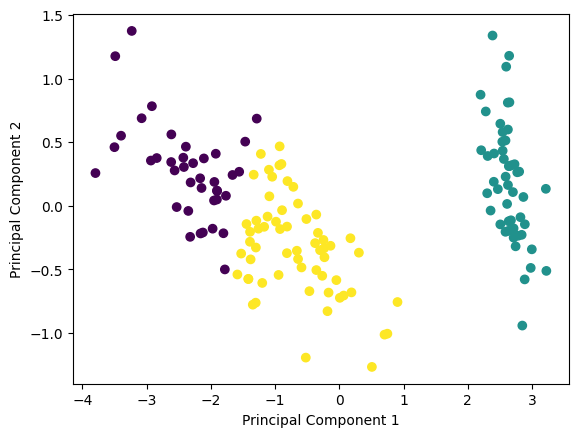

In [9]:

import numpy as np
def pca(X, num_components):
    mean_X = np.mean(X, axis=0)

    X_centered = X - mean_X

    cov_X = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_X)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = sorted_eigenvectors[:, :num_components]

    X_transformed = np.dot(X_centered, top_eigenvectors)

    return X_transformed, top_eigenvectors

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

X_transformed, top_eigenvectors = pca(X, num_components=2)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_transformed)
labels = kmeans.labels_


import matplotlib.pyplot as plt
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
